In [4]:
from NovelSwarmBehavior.novel_swarms.config.defaults import ConfigurationDefaults
from generation.evolution import ModifiedHaltingEvolution
from sklearn_extra.cluster import KMedoids
import pygame
import time
import os

In [18]:
evolution, screen = ModifiedHaltingEvolution.defaultEvolver(steps=600, evolve_population=100)
discovery = evolution.behavior_discovery

FRAMERATE = 60
running = True

outputs = []
name = f"{str(int(time.time()))}"
parent_dir = "data/baseline"
out_path = os.path.join(parent_dir, name)
os.mkdir(out_path)

for generation in range(20):

    if not running:
        break

    discovery.curr_generation = generation

    # Population loop
    for i, genome in enumerate(discovery.population):
        # Looped Event Handling
        for event in pygame.event.get():
            # Cancel the game loop if user quits the GUI
            if event.type == pygame.QUIT:
                running = False

        if not running:
            break

        screen.fill((0, 0, 0))

        discovery.curr_genome = i
        discovery.runSinglePopulation(screen=screen, i=i, seed=i, output_config=None)
        pygame.display.flip()
        # Limit the FPS of the simulation to FRAMERATE
        pygame.time.Clock().tick(FRAMERATE)

    screen.fill((0, 0, 0))
    discovery.evaluate()
    pygame.display.flip()
    discovery.evolve()

    current_time = time.time()
    last_gen_timestamp = current_time

    print("MEDOIDS TIME")
    kmedoids = KMedoids(n_clusters=8, random_state=0).fit(discovery.archive.archive)
    medoids = kmedoids.medoid_indices_

    # Collect Medoid Information
    output = ""
    for i in medoids:
        line = "["
        for j in discovery.archive.genotypes[i]:
            line += str(j) + ", "
        output += line + "],\n"

    with open(f"{out_path}/{generation}.txt", "w") as f:
        f.write(output)
        f.close()

    print(f"Completed Generation {generation}")

pygame.quit()

MEDOIDS TIME
Completed Generation 0
MEDOIDS TIME
Completed Generation 1
MEDOIDS TIME
Completed Generation 2
MEDOIDS TIME
Completed Generation 3
MEDOIDS TIME
Completed Generation 4
MEDOIDS TIME
Completed Generation 5
MEDOIDS TIME
Completed Generation 6
MEDOIDS TIME
Completed Generation 7
MEDOIDS TIME
Completed Generation 8
MEDOIDS TIME
Completed Generation 9
MEDOIDS TIME
Completed Generation 10
MEDOIDS TIME
Completed Generation 11
MEDOIDS TIME
Completed Generation 12
MEDOIDS TIME
Completed Generation 13
MEDOIDS TIME
Completed Generation 14
MEDOIDS TIME
Completed Generation 15
MEDOIDS TIME
Completed Generation 16
MEDOIDS TIME
Completed Generation 17
MEDOIDS TIME
Completed Generation 18
MEDOIDS TIME
Completed Generation 19


In [85]:
import pygame
pygame.quit()

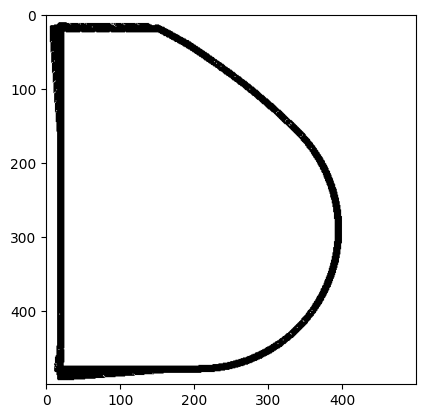

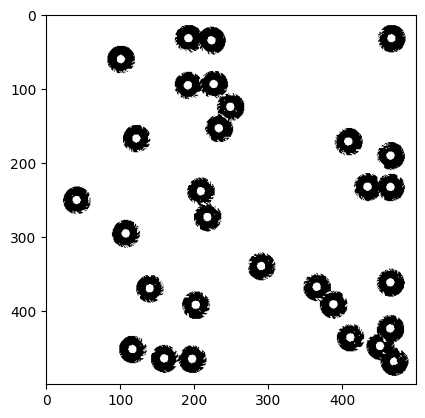

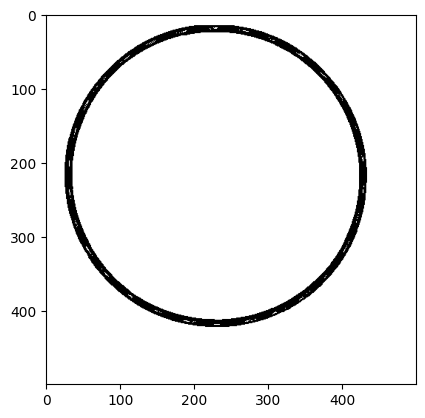

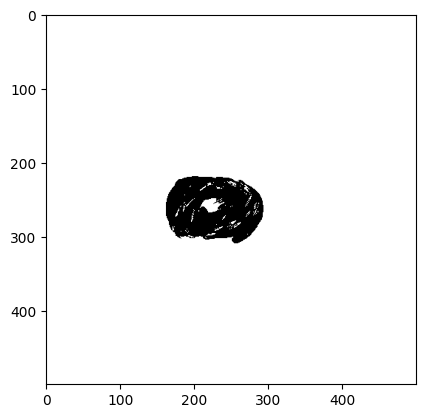

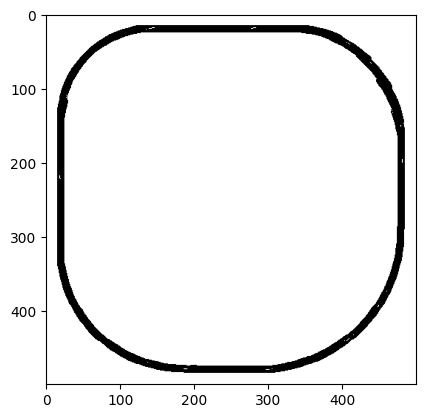

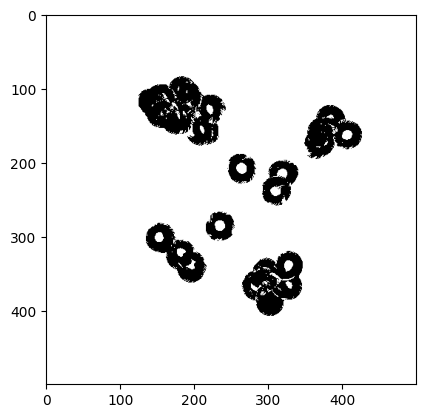

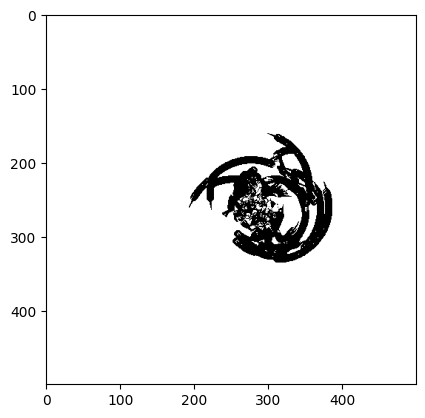

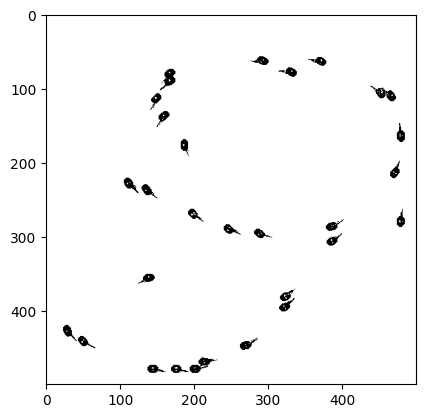

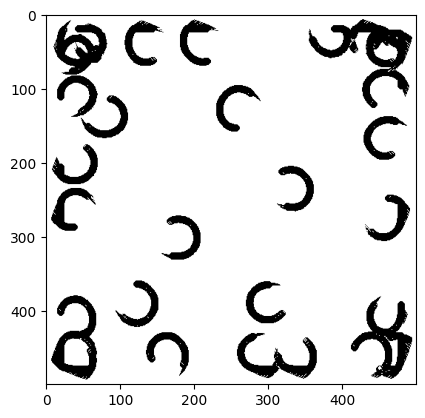

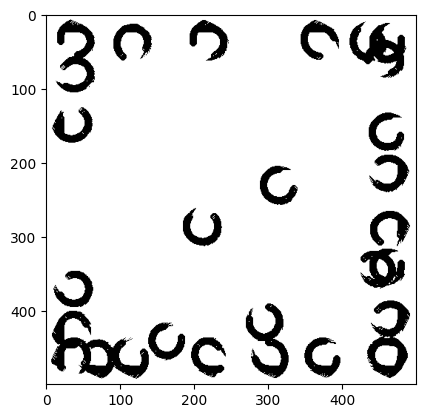

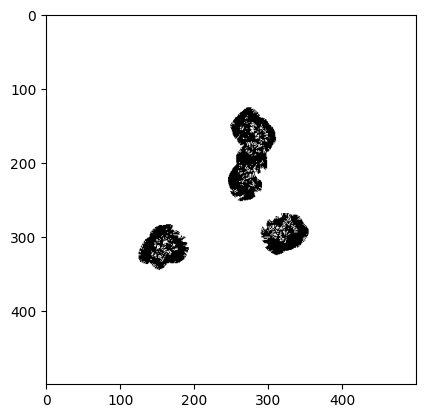

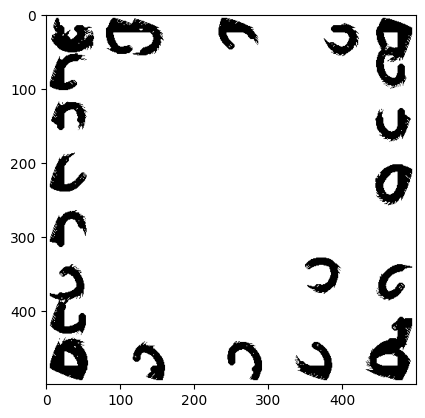

In [84]:
import matplotlib.pyplot as plot
genomes = [
[0.94520923, 0.8962 ,    0.5542 ,    0.8497    ],
[0.6528 ,    0.23721233, 0.6329 ,    0.235     ],
[0.22398939 ,0.66104988, 0.87086294, 0.7218    ],
[0.8346  ,   0.5136 ,    0.87086294, 0.7218    ],
[ 0.6493  ,    0.72810859,  0.8445 ,    -0.52773635],
[0.37564976, 1.  ,       0.48924173, 0.9221    ],
[-0.8927254,  -0.7749,     -0.06330659,  0.17254084],
[ 0.68619126 , 0.12407026, -0.83458283, -0.09507019],
[0.5062, 0.7176 ,0.4435, 1.    ],
[0.46355004, 0.71969535, 0.3593,    0.8853    ],
[-0.1938423, -0.857 ,     0.6491 ,   -0.8409   ],
[ 0.5062,      0.7176,     -0.735  ,    -0.07639049],
]

evolution, screen = ModifiedHaltingEvolution.defaultEvolver(steps=4000)

for genome in genomes:
    output, b = evolution.simulation(genome)
    plot.imshow(output, cmap="Greys")
    plot.show()